In [1]:
import pandas as pd
import joblib

# Step 1: Load Data

In [2]:
from db_connect import get_connection

table_name = input("Enter the table name: ").strip()

# This portion of the project is using the player_table

engine = get_connection()
df = pd.read_sql(f"SELECT * FROM {table_name};", con = engine)
 

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's
2,Significant Contributor,5.0,Dylan Addae-Wusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue


In [4]:
df['year'].unique()

array([2022, 2023, 2024, 2019, 2020, 2021])

In [5]:
df['player_id'].nunique()

10991

# Step 2: Clean DataFrame

In [6]:
from player_dev_clean_df import clean_df

df_train, df_2024_transfers, df_2024_no_transfers, valid_players = clean_df(df)

print(df_train.shape, df_2024_transfers.shape, df_2024_no_transfers.shape)

(2433, 74) (218, 74) (278, 74)


# Step 3: Feature Selection, Engineering & Scaling

In [7]:
import eng_vars as ev
train_data_scaled = ev.split_scale(df_train)
scaler_x = train_data_scaled['scaler_x']


# Step 4: Train Ensemble Model (Stacking Regressor)

In [8]:
from player_dev_ml_models import ml_stack_model_w_grid_search

#best_stack_model = ml_stack_model_w_grid_search(train_data_scaled["X_train"], train_data_scaled["Y_train"])

''' Model was run and saved to the pd_fe file on 7/21/25 by JRS '''


' Model was run and saved to the pd_fe file on 7/21/25 by JRS '

In [9]:
# Load the Pickle file of the model 

best_stack_model = joblib.load('best_stack_model.pkl')

best_stack_model

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('gb',
                               HistGradientBoostingRegressor(max_iter=200,
                                                             random_state=42))],
                  final_estimator=GradientBoostingRegressor(random_state=42),
                  passthrough=True)

# Step 5: Model Results

In [10]:
from p_dev_mdl_rslts import *

summary_2024_transfers = model_vs_actual(df_2024_transfers, scaler_x, best_stack_model)
summary_2024_no_transfers = model_vs_actual(df_2024_no_transfers, scaler_x, best_stack_model)


### Prediction vs actual of 4th year for players who played all four seasons at one school. 

Mean Squared Error: 0.10
R² Score: 0.806


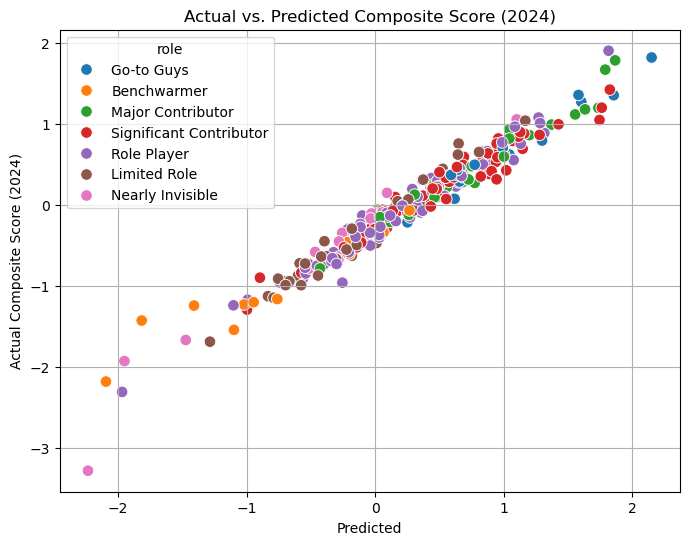

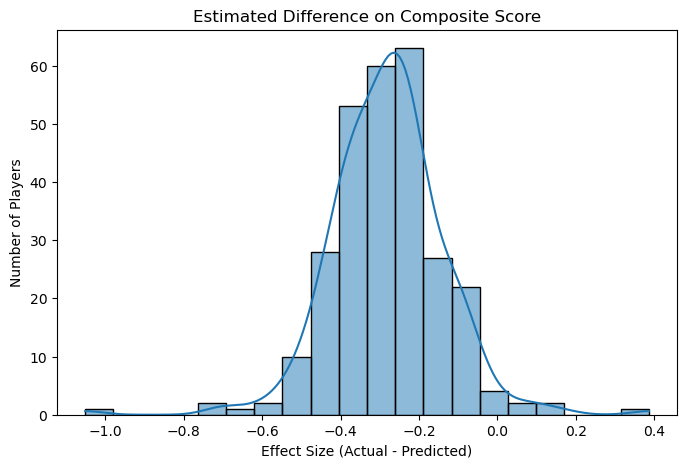

In [11]:
# Results to test the models predicted values for players who stayed 4 years at one school. 
# Model trained on 3 years and then predicts year 4 vs actual for year 4 at that school
top0, bottom0 = model_results(summary_2024_no_transfers)

In [12]:
top0

,player,Actual Composite Score (2024),Predicted,Estimated Difference,role
256,Harouna Sissoko,-1.429460,-1.815433,0.385973,Benchwarmer
70,Bryson Childress,-1.244712,-1.408407,0.163695,Benchwarmer
148,Mason Gillis,0.756499,0.649062,0.107438,Limited Role
205,Max Fiedler,1.903022,1.815308,0.087714,Role Player
99,Avery Felts,0.147457,0.092073,0.055384,Nearly Invisible


In [13]:
bottom0

,player,Actual Composite Score (2024),Predicted,Estimated Difference,role
239,Quoiren Waldon,-3.284698,-2.233377,-1.051320,Nearly Invisible
55,Dylan Branson,-0.961680,-0.254749,-0.706931,Role Player
216,Isaiah Hill,1.047328,1.744775,-0.697447,Significant Contributor
209,Golden Dike,0.314810,0.944365,-0.629554,Significant Contributor
131,Josh Pierre-Louis,0.426031,1.019745,-0.593714,Significant Contributor


### Prediction vs actual of 4th year for players who played three seasons at one school before transferring for year 4. 

Mean Squared Error: 0.05
R² Score: 0.899


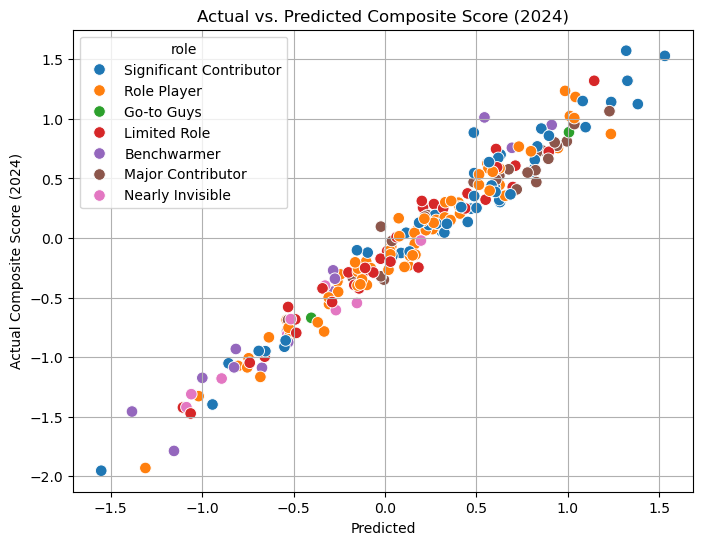

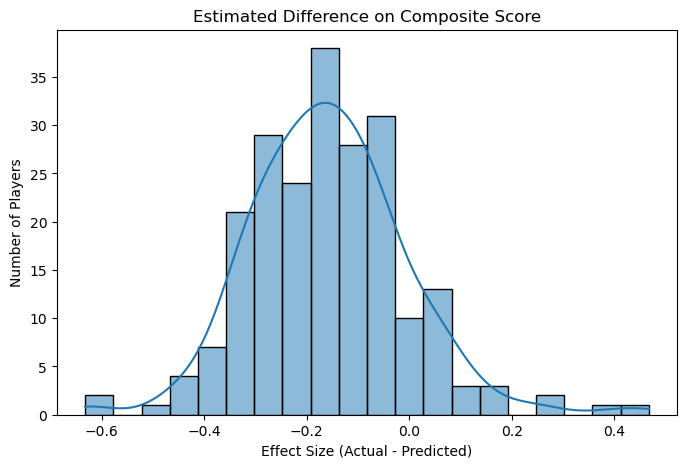

In [14]:
# Results to test the models predicted values for players who stayed 3 years at one school before transferring. 
# Model trained on 3 years and then predicted year 4 as if the player stayed at same school vs actual for year 4 at different school
top1, bottom1 = model_results(summary_2024_transfers)

In [15]:
top1

,player,Actual Composite Score (2024),Predicted,Estimated Difference,role
13,Julian Rishwain,1.011888,0.544750,0.467138,Benchwarmer
50,Jared Bynum,0.884574,0.486457,0.398117,Significant Contributor
12,Zyon Pullin,1.571381,1.320278,0.251102,Significant Contributor
32,Nate Martin,1.234266,0.985834,0.248432,Role Player
58,Joe Anderson,1.318988,1.145152,0.173836,Limited Role


In [16]:
bottom1

,player,Actual Composite Score (2024),Predicted,Estimated Difference,role
88,Evan Johnson,-1.786404,-1.154275,-0.632128,Benchwarmer
135,Terrell Williams,-1.929569,-1.310784,-0.618786,Role Player
112,Jeremiah Oden,-1.165407,-0.681525,-0.483881,Role Player
200,Tre Wood,-1.396853,-0.943514,-0.453339,Significant Contributor
69,Anthony Crump,-0.784138,-0.332691,-0.451447,Role Player


In [17]:
# Model 1: Players who stayed
avg_diff_model1 = summary_2024_no_transfers["Estimated Difference"].mean()

# Model 2: Transfers (actual vs predicted if stayed)
avg_diff_model2 = summary_2024_transfers["Estimated Difference"].mean()

print(f"Average diff (Model 1 - no transfers): {avg_diff_model1:.4f}")
print(f"Average diff (Model 2 - transfers): {avg_diff_model2:.4f}")

Average diff (Model 1 - no transfers): -0.2801
Average diff (Model 2 - transfers): -0.1585


On average, players who stayed at their original school for four years performed 0.28 points below what our model predicted based on their first three years.
Players who transferred after three years also underperformed expectations, but by a smaller margin of 0.16 points.
Players are not neccessarily worse, just their growth between their third to fourth year is less than in prior years (this makes sense, fourth year players are not expected to make the same jump in their game as other players).
This suggests that while both groups saw less growth than predicted in year 4, transferring may mitigate that shortfall. In other words, transferring might offer a performance advantage — not by guaranteeing improvement, but by helping players avoid the stagnation or slower growth they may have experienced if they had stayed.
These findings provide preliminary evidence that transferring can be beneficial for maintaining or improving a player’s developmental trajectory in year 4.

In [19]:
def get_2024_team(summary_df, original_df):
    # Filter original_df for 2024 entries
    df_24 = original_df[original_df['year'] == 2024]
    
    # Select only player and team columns
    df_24_team = df_24[['player', 'team']].drop_duplicates()

    # Merge on player to get team
    merged_df = summary_df.merge(df_24_team, on = 'player', how = 'left')

    return merged_df

player_team_2024 = get_2024_team(summary_2024_transfers, df)

player_team_2024.head()

,player,Actual Composite Score (2024),Predicted,Estimated Difference,team
0,Rodney Howard,-0.125654,0.088050,-0.213703,Western Kentucky
1,Brandon Newman,-0.319469,-0.133702,-0.185768,Western Kentucky
2,Khydarius Smith,-0.669608,-0.403061,-0.266547,UMBC
3,Garrett Hicks,0.284952,0.267976,0.016976,Samford
4,Zach Loveday,-0.449286,-0.282612,-0.166674,Samford


In [20]:
team_effect_sum = player_team_2024.groupby('team')['Estimated Difference'].sum().sort_values(ascending = False)

# Display the top 5 teams
top_5_teams = team_effect_sum.head(5)

print("Top 5 teams by net estimated transfer impact:")
for team, impact in top_5_teams.items():
    print(f"{team}: {impact:.2f}")

Top 5 teams by net estimated transfer impact:
Florida: 0.60
Stanford: 0.40
Marshall: 0.25
Alabama: 0.21
Denver: 0.14


In [20]:
team_effect_sum = player_team_2024.groupby('team')['Estimated Difference'].sum().sort_values(ascending=True)

# Display the bottom 5 teams
bottom_5_teams = team_effect_sum.head(5)

print("Bottom 5 teams by net estimated transfer impact:")
for team, impact in bottom_5_teams.items():
    print(f"{team}: {impact:.2f}")

Bottom 5 teams by net estimated transfer impact:
Iona: -1.05
Butler: -0.88
UNC Asheville: -0.84
Richmond: -0.74
Villanova: -0.70


In [21]:
player_team_2024[player_team_2024['team'] == 'Alabama']

,player,Actual Composite Score (2024),Predicted,Estimated Difference,team
7,Grant Nelson,0.699665,0.632932,0.066733,Alabama
8,Latrell Wrightsell,0.746754,0.607929,0.138826,Alabama


In [22]:
player_team_2024[player_team_2024['team'] == 'TCU']

,player,Actual Composite Score (2024),Predicted,Estimated Difference,team
43,Avery Anderson,0.442651,0.617218,-0.174567,TCU
44,Essam Mostafa,0.255546,0.208435,0.047111,TCU


In [23]:
player_team_2024[player_team_2024['team'] == 'Iona']

,player,Actual Composite Score (2024),Predicted,Estimated Difference,team
135,Joel Brown,0.872878,1.236532,-0.363654,Iona
136,Terrell Williams,-1.929569,-1.310784,-0.618786,Iona
137,Wheza Panzo,0.248973,0.318711,-0.069739,Iona


In [24]:
# Change the name to any player for a radar plot of the top 10 features

player_name_for_plot = "Latrell Wrightsell"

In [25]:
get_full_feature_names(best_stack_model, df, ev.model_vars)

plot_player_radar(player_name_for_plot, 
                  pd.concat([pd.DataFrame(ev.model_vars(df)[1], columns = get_full_feature_names(best_stack_model, df, ev.model_vars)), 
                             pd.DataFrame({'player': ev.model_vars(df)[2]})], axis = 1), 
                  best_stack_model, 
                  get_full_feature_names(best_stack_model, df, ev.model_vars), 
                  top_n = 10).show()

# Step 6: Push Data to Database

In [25]:
# Combine two 2024 dataframes so they are in one table in the database 

# Add transfer column to each DataFrame
summary_2024_transfers['transfer'] = True
summary_2024_no_transfers['transfer'] = False

combined_df = pd.concat([summary_2024_transfers, summary_2024_no_transfers], ignore_index = True)

team_combined_df = get_2024_team(combined_df, df)

team_combined_df.sample(5)

,player,Actual Composite Score (2024),Predicted,Estimated Difference,transfer,team
486,Jamal Shead 8,1.783789,1.866421,-0.082632,False,Houston
42,Hunter Dean,0.427841,0.699516,-0.271675,True,LSU
195,Justin Wright,0.259370,0.417452,-0.158082,True,Loyola Marymount
168,Reese Waters,-0.256190,-0.147398,-0.108792,True,San Diego St.
147,Szymon Zapala,-0.024593,0.038114,-0.062706,True,Longwood


In [26]:
''' 7/15/25 - Database table ind_player_dev_predict_2024 was updated '''

from push_db_data import push_data_to_db
 
# push_db_data.push_data_to_db(team_combined_df)